In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [3]:
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
salary.shape

(397, 6)

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [6]:
salary.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
salary['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [8]:
salary['discipline'].unique()

array(['B', 'A'], dtype=object)

In [9]:
new_rank = pd.Categorical(salary['rank'])
new_rank = new_rank.rename_categories([0,1,2])
new_rank.describe()

,counts,freqs
categories,,
0,64,0.161209
1,67,0.168766
2,266,0.670025


In [10]:
salary["rank"]= new_rank
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,B,19,18,Male,139750
1,2,B,20,16,Male,173200
2,1,B,4,3,Male,79750
3,2,B,45,39,Male,115000
4,2,B,40,41,Male,141500


In [11]:
new_discipline = pd.Categorical(salary['discipline'])
new_discipline = new_discipline.rename_categories([0,1])
new_discipline.describe()

,counts,freqs
categories,,
0,181,0.455919
1,216,0.544081


In [12]:
salary["discipline"]= new_discipline
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,Male,139750
1,2,1,20,16,Male,173200
2,1,1,4,3,Male,79750
3,2,1,45,39,Male,115000
4,2,1,40,41,Male,141500


In [13]:
salary = salary.drop('sex',axis=1)

In [14]:
salary

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


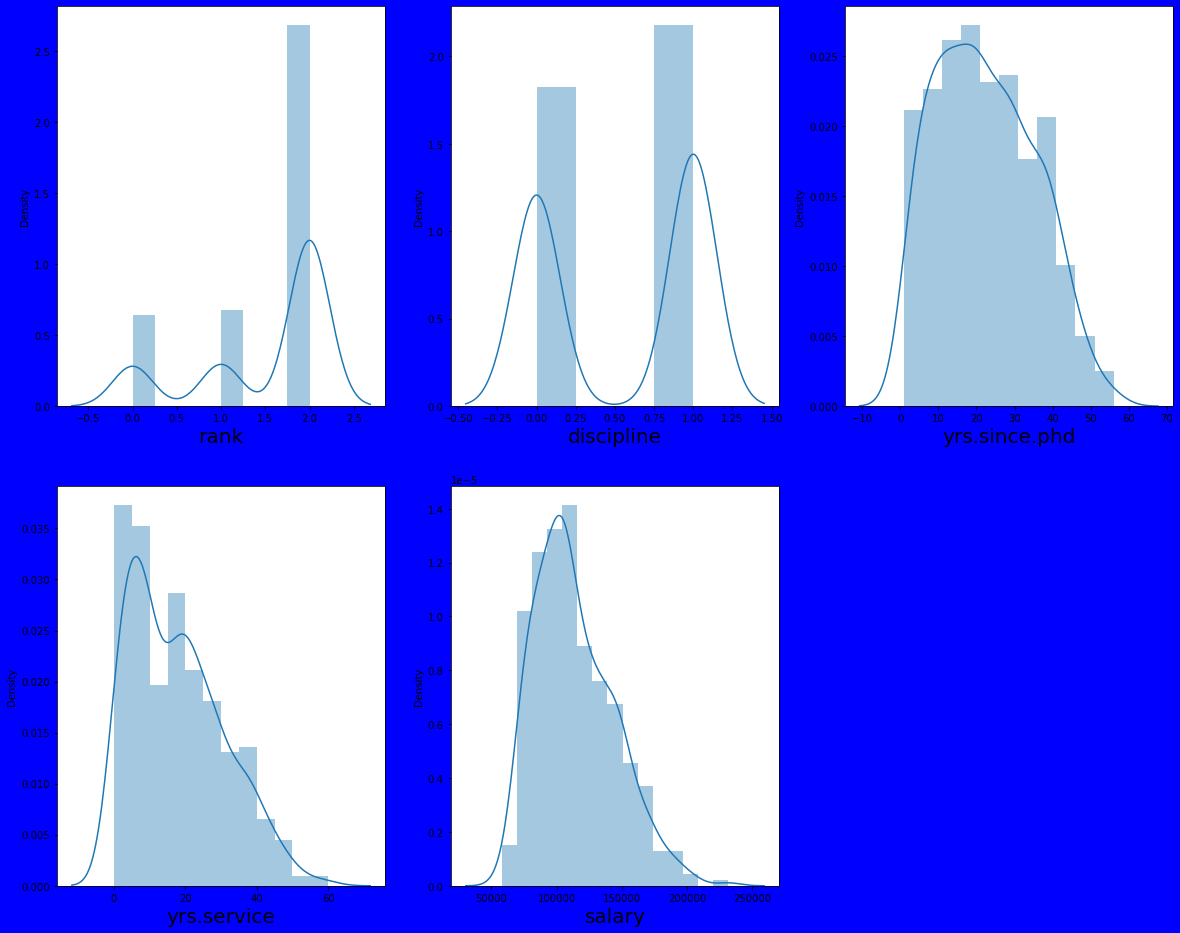

In [15]:
plt.figure(figsize=(20,25),facecolor = 'blue')
plotnumber = 1

for column in salary:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(salary[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show() 

In [16]:
salary.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [17]:
y = salary['salary']
x = salary.drop(columns = ['salary'])

In [18]:
x

,rank,discipline,yrs.since.phd,yrs.service
0,2,1,19,18
1,2,1,20,16
2,1,1,4,3
3,2,1,45,39
4,2,1,40,41
...,...,...,...,...
392,2,0,33,30
393,2,0,31,19
394,2,0,42,25
395,2,0,25,15


In [19]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

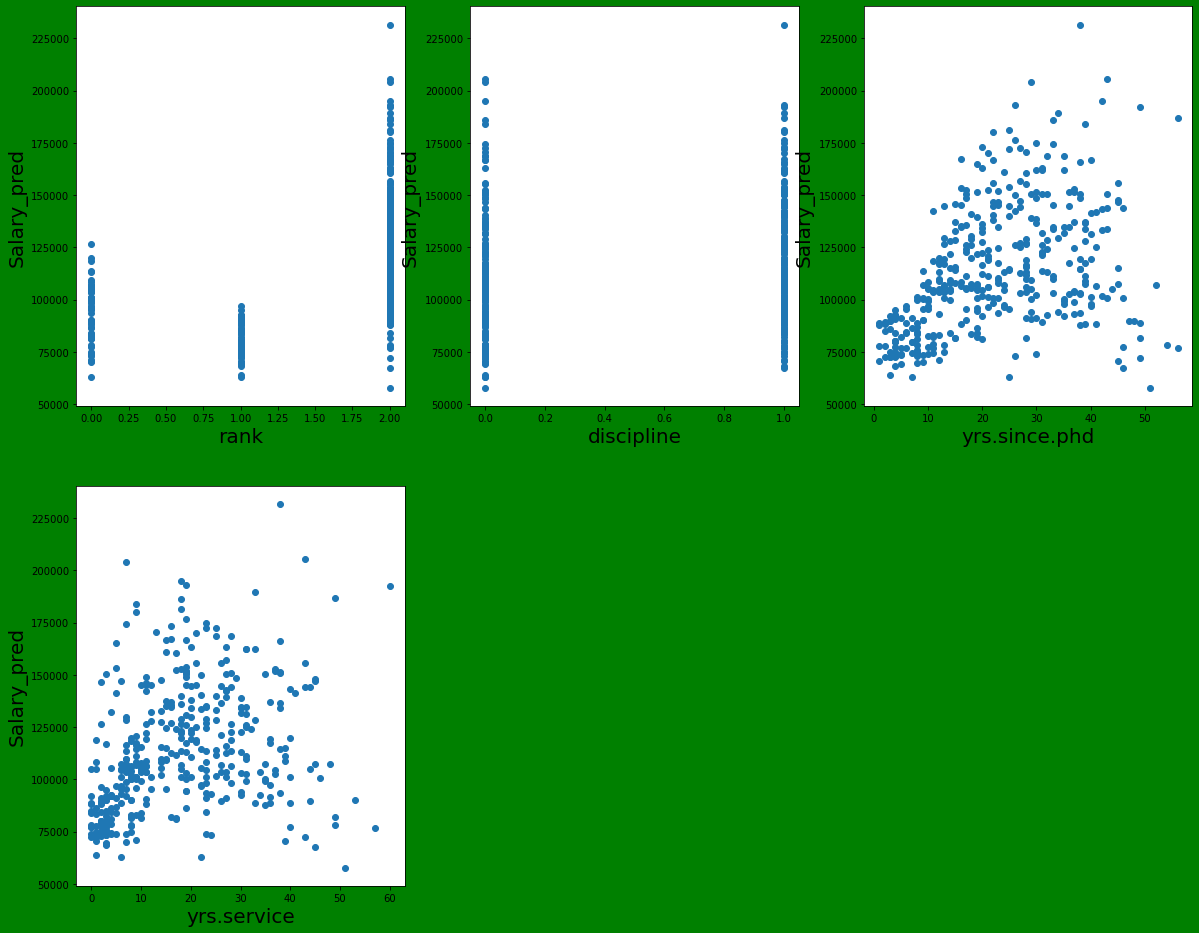

In [20]:
plt.figure(figsize=(20,25),facecolor = 'green')
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Salary_pred',fontsize=20)
        
    plotnumber+=1
plt.show() 

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [22]:
X_scaled

array([[ 0.64925739,  0.91540317, -0.25754973,  0.02966908],
       [ 0.64925739,  0.91540317, -0.17985426, -0.12429986],
       [-0.67256406,  0.91540317, -1.42298184, -1.12509795],
       ...,
       [ 0.64925739, -1.09241483,  1.52944617,  0.56856036],
       [ 0.64925739, -1.09241483,  0.20862311, -0.20128433],
       [-0.67256406, -1.09241483, -1.11219995, -1.04811348]])

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = 20)
y_train.head()

200     92700
53     106639
147    156938
16     101000
83      88825
Name: salary, dtype: int64

In [24]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [25]:
salary.tail(5)

,rank,discipline,yrs.since.phd,yrs.service,salary
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329
396,1,0,8,4,81035


In [26]:
print('Salary Prediction is : ', regression.predict(scaler.transform([[2,0,33,30]])))

Salary Prediction is :  [118612.32300919]


In [27]:
print('Salary Prediction is : ', regression.predict(scaler.transform([[2,0,31,19]])))

Salary Prediction is :  [124200.331796]


In [28]:
print('Salary Prediction is : ', regression.predict(scaler.transform([[1,0,8,4]])))

Salary Prediction is :  [89563.68092305]


In [29]:
filename = 'Finalised_model.pickle'
pickle.dump(regression,open(filename, 'wb'))

loaded_model = pickle.load(open(filename,'rb'))

a = loaded_model.predict(scaler.transform([[2,0,33,30]]))
a

array([118612.32300919])

In [30]:
regression.score(x_train,y_train)

0.3619622609596783

In [31]:
regression.score(x_test,y_test)

0.3790020029321912

In [32]:
y_pred = regression.predict(x_test)

In [33]:
y_pred

array([ 89062.98395531, 123198.97897621, 104598.32895966, 118221.5539626 ,
       122204.96092776, 133415.16936537,  91627.43351927,  98585.36026227,
       131658.93494889, 119784.63014894, 128711.2712637 ,  97447.24398651,
       123081.53724538, 121765.13187833, 126461.69520866, 117474.20673343,
       127079.81334939,  97090.66580392, 122883.92642895, 120627.01560257,
       144178.21398223, 118509.75041721, 137061.31987307,  85504.53690073,
       135991.5853253 , 110433.02912359,  95762.4525214 , 110110.641805  ,
       131404.92935828,  91874.08378071, 121745.81015319, 124967.00075031,
       126119.98616492, 139413.26892391, 133187.82027123,  84654.63763742,
       136047.98009948, 115945.32141109,  90311.02815222, 129094.50594277,
       141154.63420154, 125001.19161431, 124735.19906989, 111961.91444594,
       130046.9983559 , 123768.03711409,  97268.95489522,  97090.66580392,
        86540.10114235, 123259.82633668, 100080.05472062, 128168.8696223 ,
        73068.50873423, 1

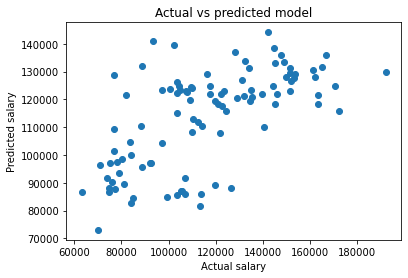

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual salary')
plt.ylabel('Predicted salary')
plt.title('Actual vs predicted model')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
y_pred = regression.predict(x_test)

In [38]:
mean_absolute_error(y_test,y_pred)

18644.77620234727

In [39]:
mean_squared_error(y_test,y_pred)

525622118.8553195

In [40]:
np.sqrt(mean_squared_error(y_test,y_pred))

22926.45020179355